In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-dataset/data.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.svm import SVC
!pip install umap-learn
from umap import UMAP
from sklearn.preprocessing import StandardScaler

# **Exploring Dataset**

In [8]:
data = pd.read_csv('../input/breast-cancer-dataset/data.csv')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
data.info()
print("----------------------------------------------------------")
print(' ')
print('Data Shape: ',data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## **Inspecting Missing value**

In [11]:
print('Checking Missing Values: \n', data.isnull().sum())

Checking Missing Values: 
 id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [12]:
# diagnosis column data information (B-benign, M-malignant)
# It is necessary to identify whether data are balanced or unbalanced. 
# It can be observed that the dataset was not smoothly balanced. The below result apparently shows that B data values are more than M's

print ('The number of M and B: \n', data['diagnosis'].value_counts())

The number of M and B: 
 B    357
M    212
Name: diagnosis, dtype: int64


# **Data Visualisation**

## **Plotting diagnosis distribution**

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

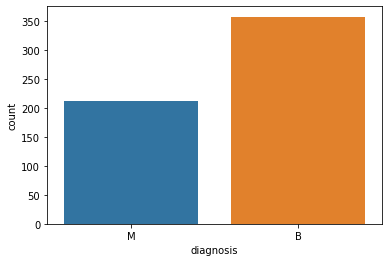

In [13]:
sns.countplot(x = 'diagnosis',data = data)
# We can find the data of both categorical variables is not balanced

### **Convert Categorical Columns to Numeric**
For setting up logistic regression later, we need to transfer the string type to numeric data type described.

In [17]:
df_ones = pd.get_dummies(data['diagnosis'])
datas = pd.concat((df_ones,data),axis=1)
datas = datas.drop(['diagnosis'],axis = 1)
datas = datas.drop(['M'],axis = 1)
datas = datas.rename(columns = {'B':'diagnosis'})
datas.head()

,diagnosis,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## **Plot Histogram of data to show the distribution**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

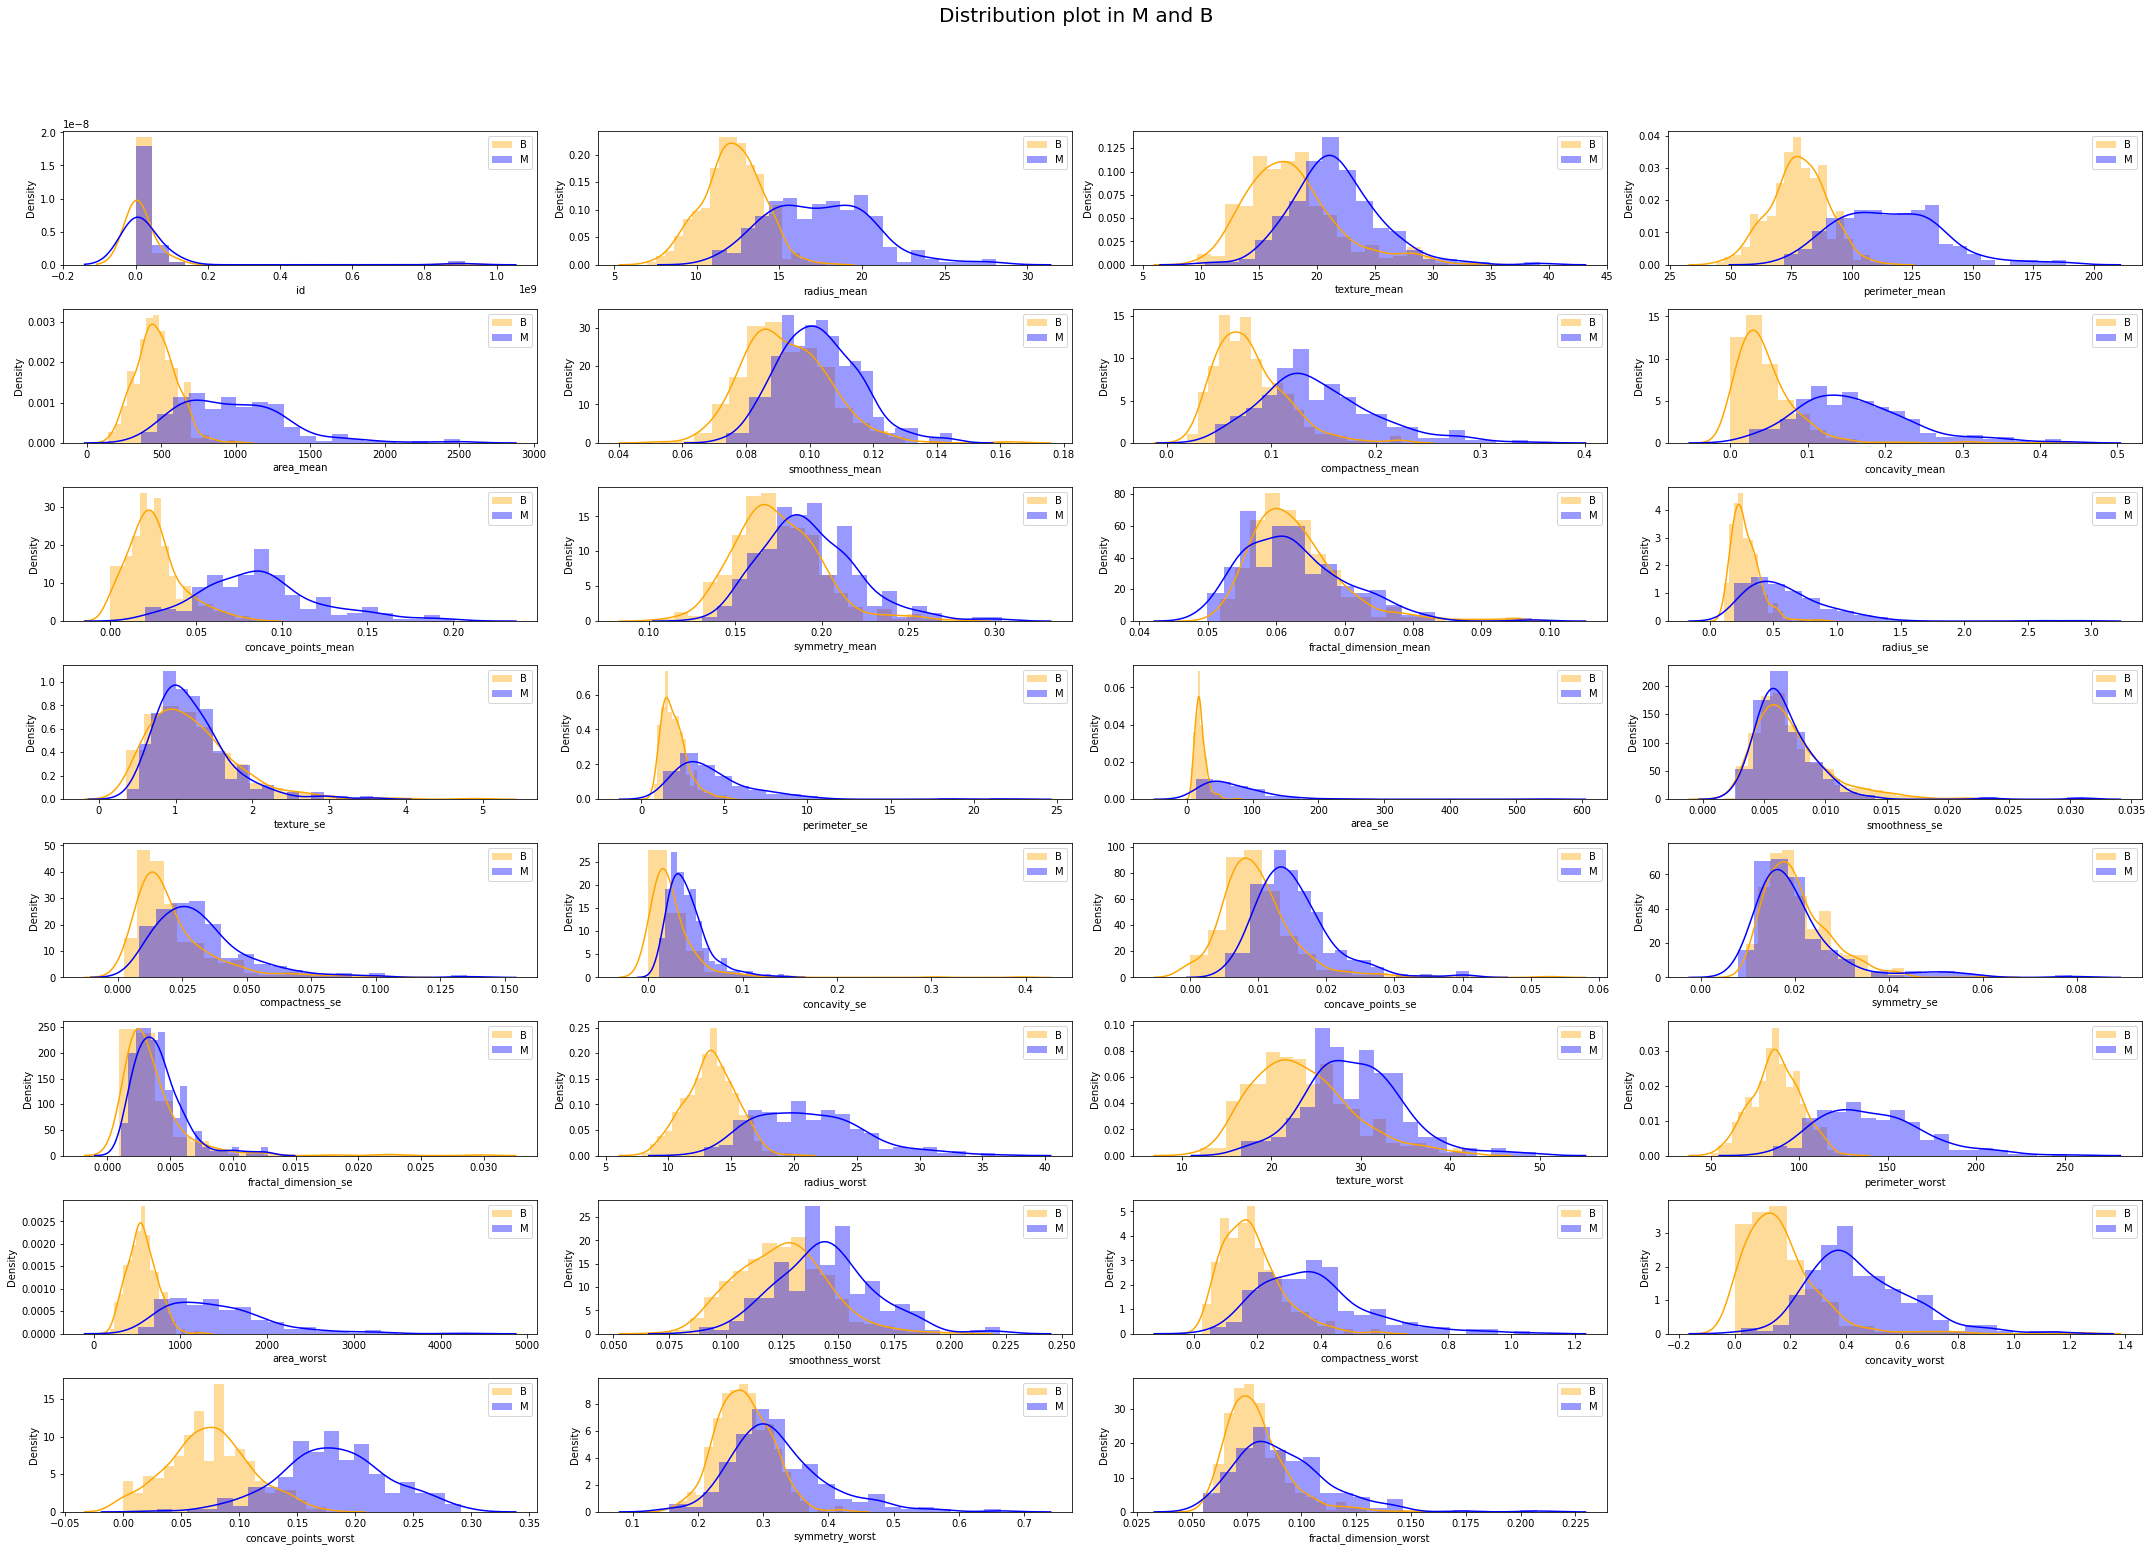

In [19]:
plt.figure(figsize = (30,25),tight_layout = True)
for i in range(1, len(list(datas.columns))):
    
    plt.subplot(10,4,i)
    
    sns.distplot(datas[list(datas.columns)[i]][datas['diagnosis'] == 1],label = 'B', color = 'orange', bins = 20,hist = True )
    sns.distplot(datas[list(datas.columns)[i]][datas['diagnosis'] == 0],label = 'M', color = "blue", bins = 20,hist = True)

    plt.legend()
plt.suptitle('Distribution plot in M and B', y=1.04, size=20)
plt.tight_layout()
plt.show()

## **Box-plot for outliers distributions**

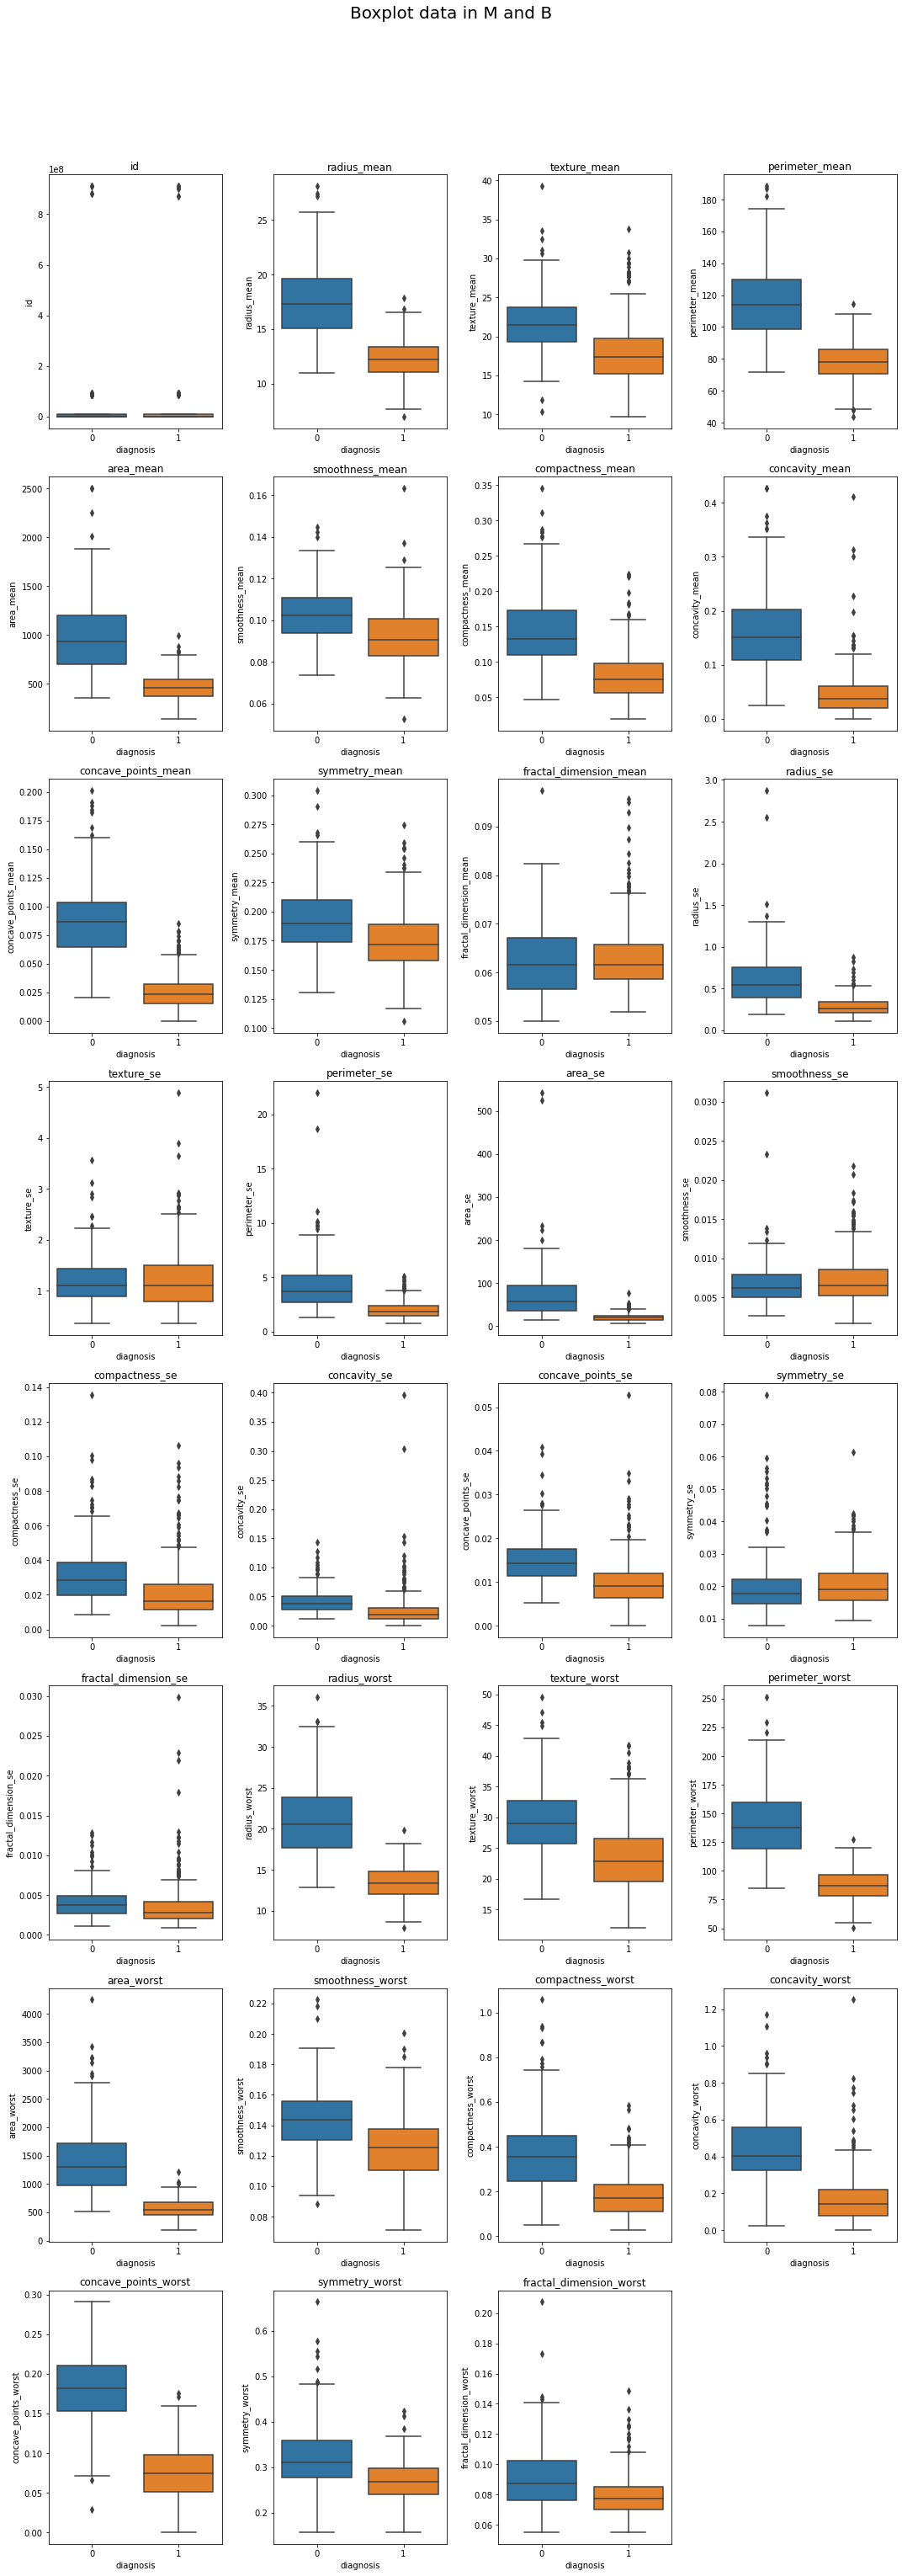

In [21]:
fig = plt.figure(figsize = (15,50),tight_layout=True)
for i in range(1, len(list(datas.columns))):
    ax = fig.add_subplot(10, 4, i)
    sns.boxplot(x=datas['diagnosis'],y= list(datas.columns)[i] , data=datas)
    ax.set_title(datas.columns[i])
    
plt.suptitle('Boxplot data in M and B', y=1.04, size=20)
plt.tight_layout()
plt.show()

## **Correlation of variables**

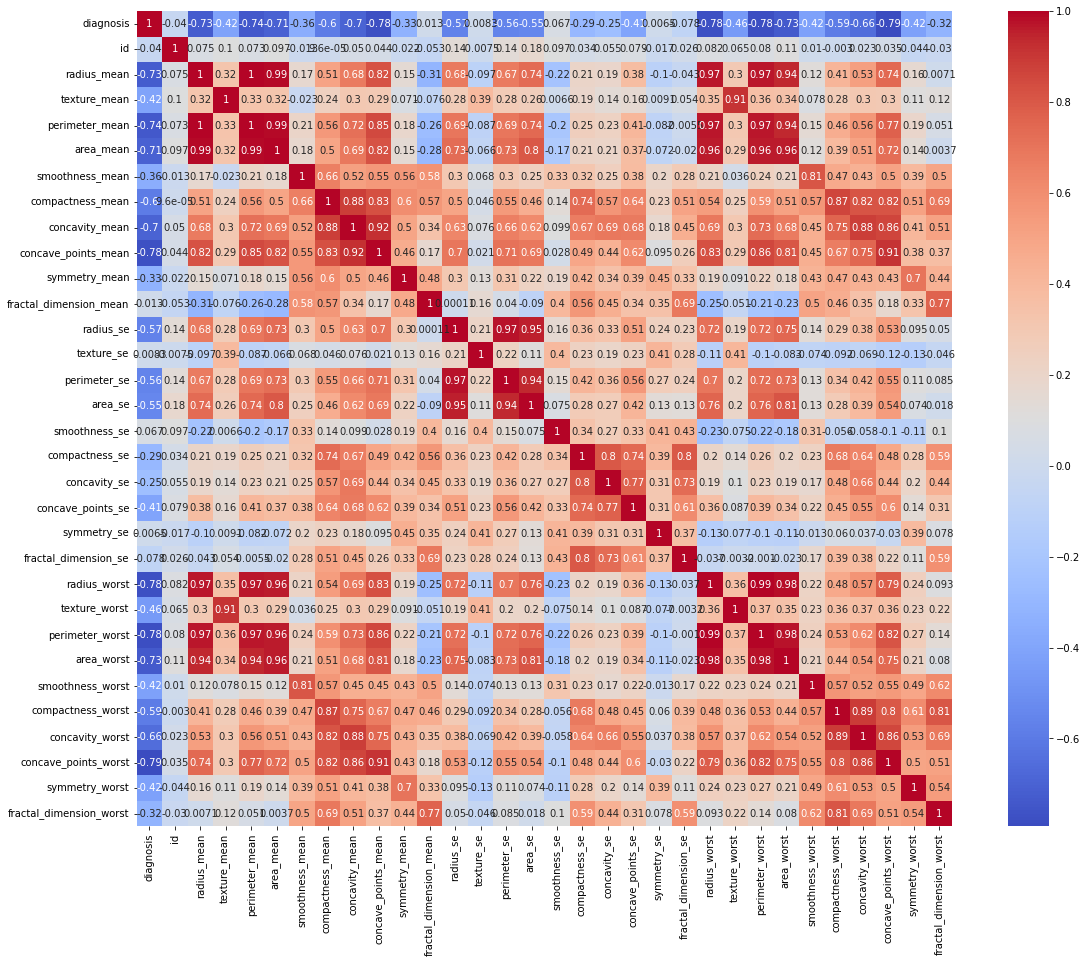

In [22]:
plt.figure (figsize = (20,15));
sns.heatmap(datas.corr(), annot = True, square = True, cmap = 'coolwarm');
plt.show()

In [23]:
datascorr = datas.corr()
high_correlation = datascorr.abs()
high_correlation_unstack = high_correlation.unstack()
high_correlation_sort = high_correlation_unstack.sort_values(ascending=False)

print(high_correlation_sort[30:35])

radius_mean              radius_mean                1.000000
fractal_dimension_worst  fractal_dimension_worst    1.000000
radius_mean              perimeter_mean             0.997855
perimeter_mean           radius_mean                0.997855
perimeter_worst          radius_worst               0.993708
dtype: float64


## **Pairs Plot**

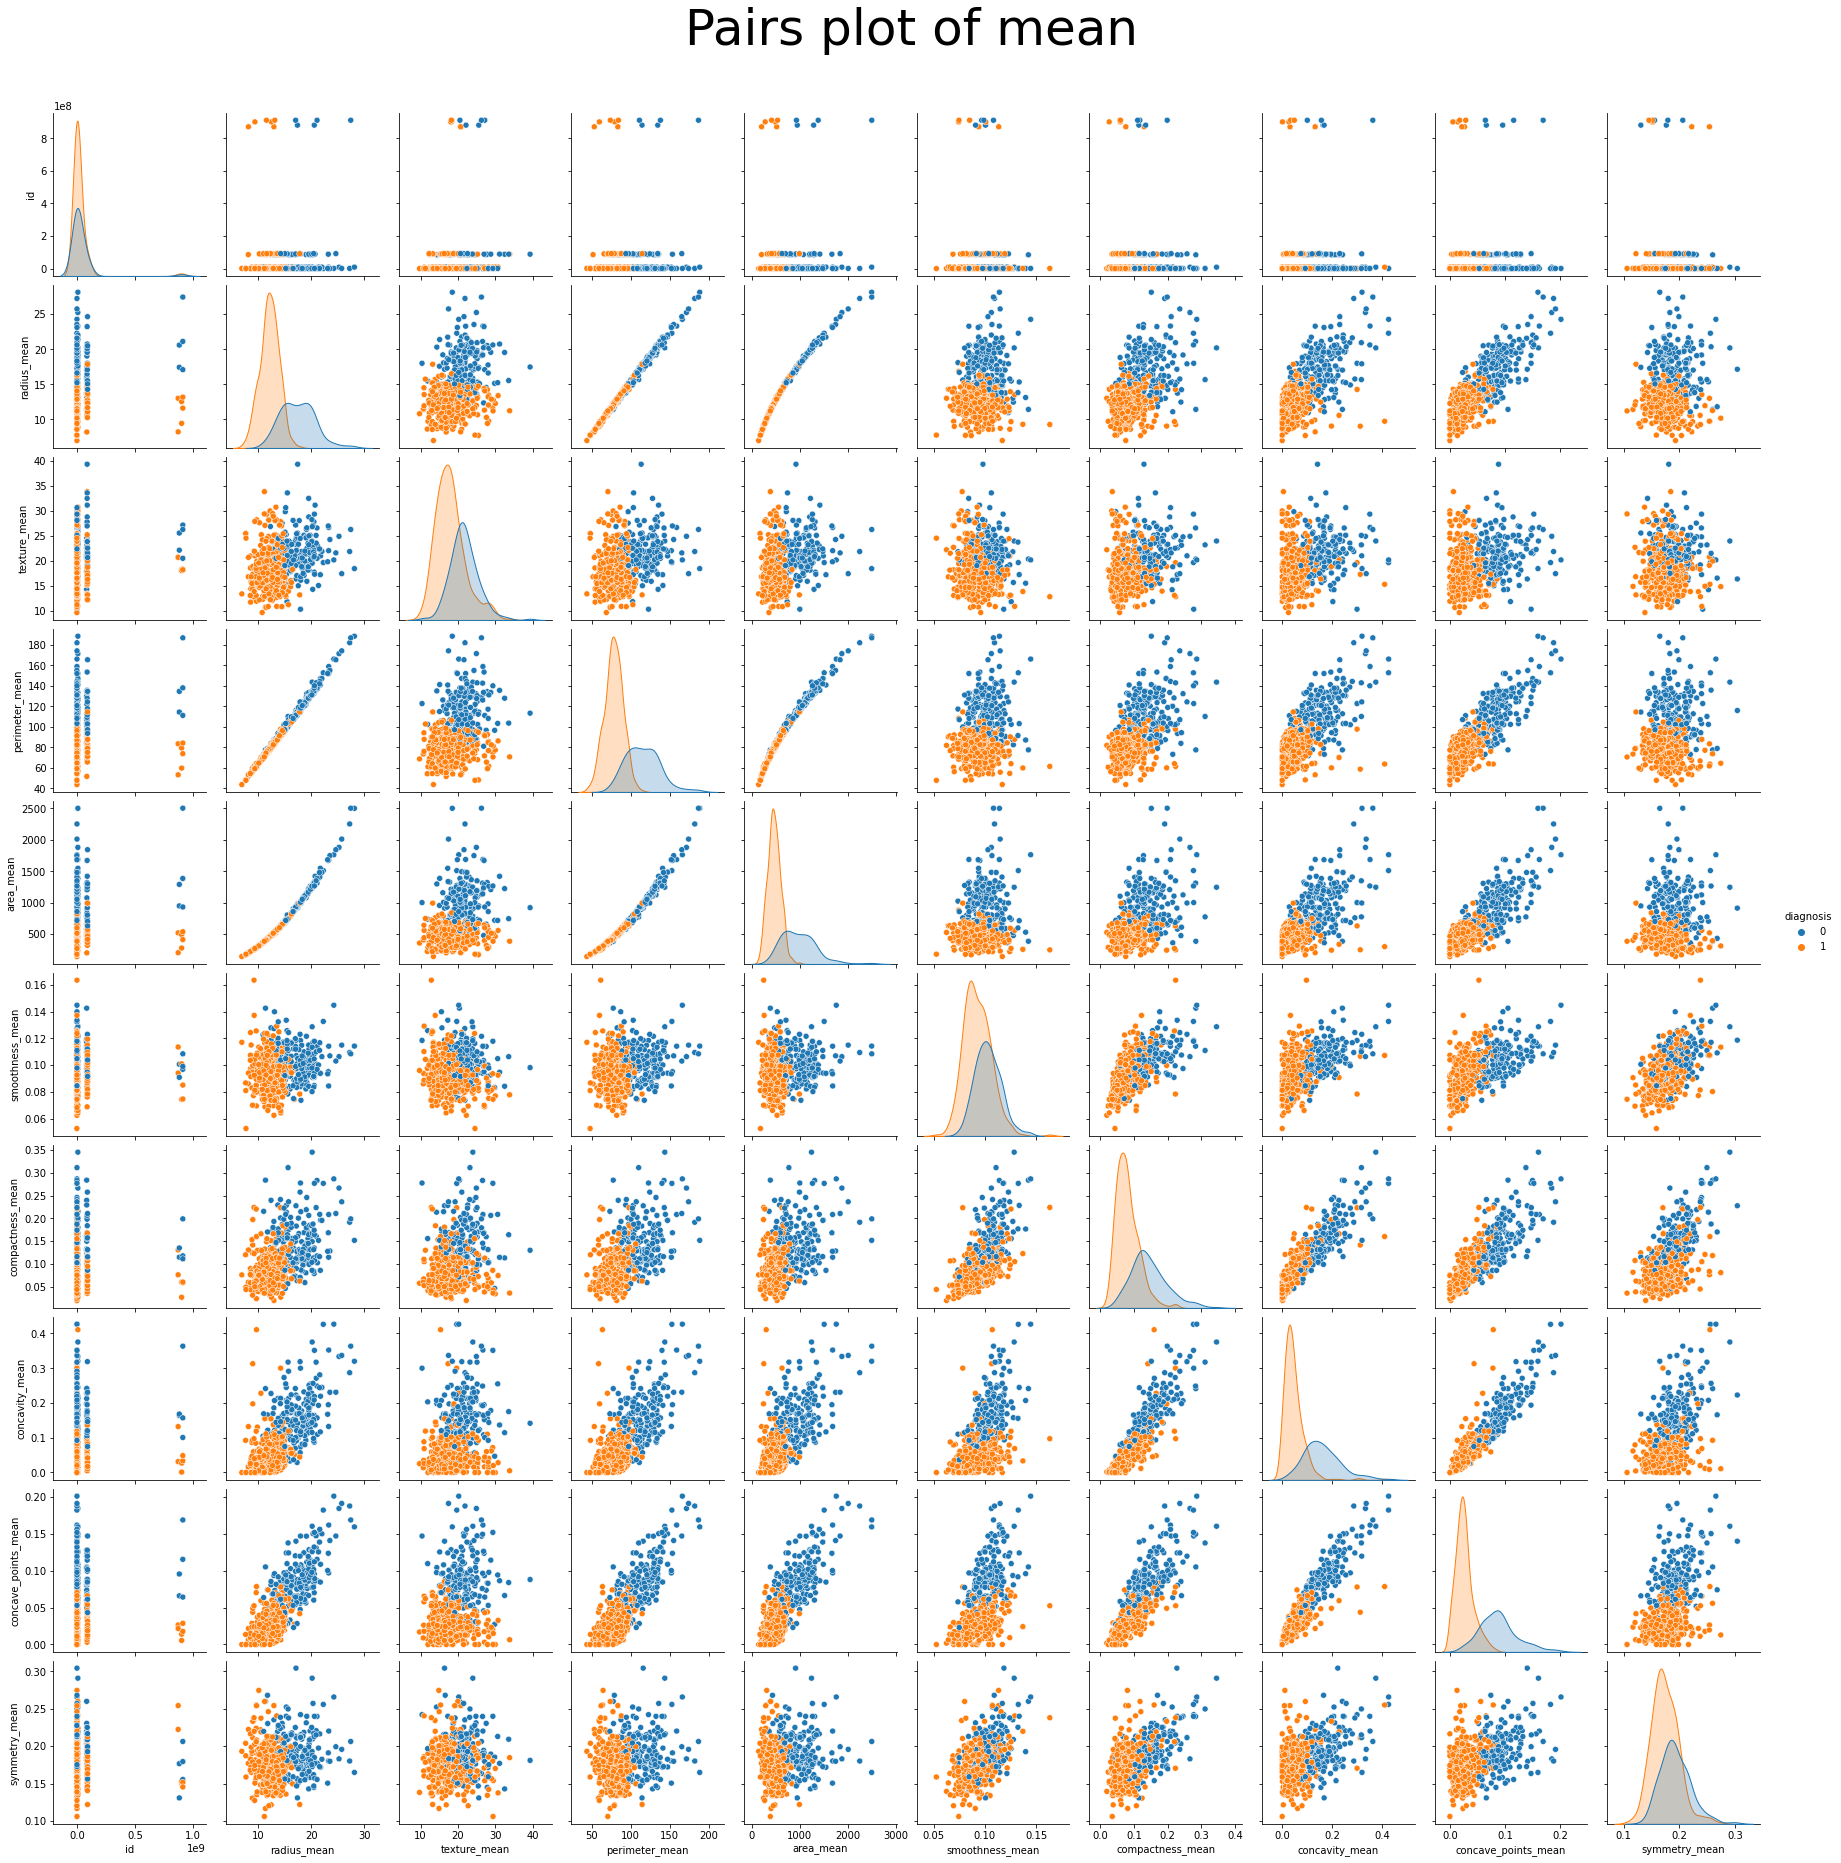

In [24]:
sns.pairplot(datas, hue='diagnosis',vars=list(datas.columns[1:11]))
plt.suptitle('Pairs plot of mean', y=1.04, size=50)
plt.show()

# **Train/Test set**
Train / Test set = 70 / 30

In [25]:
target = 'diagnosis'
X = datas.drop([target],axis = 1)
Y = datas[target]
x_train0, x_test0, y_train0, y_test0 = train_test_split(X,Y, train_size = 0.7, test_size = 0.3, random_state = 123)
print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',x_train0.shape,y_train0.shape,'\nTesting set   ---> ', x_test0.shape,'', y_test0.shape)

Original set  --->  (569, 31) (569,) 
Training set  --->  (398, 31) (398,) 
Testing set   --->  (171, 31)  (171,)


In [33]:
x_train0

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
559,925291,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,...,12.48,37.16,82.28,474.2,0.12980,0.2517,0.36300,0.09653,0.2112,0.08732
295,891923,13.77,13.27,88.06,582.7,0.09198,0.06221,0.01063,0.01917,0.1592,...,14.67,16.93,94.17,661.1,0.11700,0.1072,0.03732,0.05802,0.2823,0.06794
264,889719,17.19,22.07,111.60,928.3,0.09726,0.08995,0.09061,0.06527,0.1867,...,21.58,29.33,140.50,1436.0,0.15580,0.2567,0.38890,0.19840,0.3216,0.07570
125,86561,13.85,17.21,88.44,588.7,0.08785,0.06136,0.01420,0.01141,0.1614,...,15.49,23.58,100.30,725.9,0.11570,0.1350,0.08115,0.05104,0.2364,0.07182
280,8912049,19.16,26.60,126.20,1138.0,0.10200,0.14530,0.19210,0.09664,0.1902,...,23.72,35.90,159.80,1724.0,0.17820,0.3841,0.57540,0.18720,0.3258,0.09720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,862485,11.60,12.84,74.34,412.6,0.08983,0.07525,0.04196,0.03350,0.1620,...,13.06,17.16,82.96,512.5,0.14310,0.1851,0.19220,0.08449,0.2772,0.08756
322,894855,12.86,13.32,82.82,504.8,0.11340,0.08834,0.03800,0.03400,0.1543,...,14.04,21.08,92.80,599.5,0.15470,0.2231,0.17910,0.11550,0.2382,0.08553
382,90250,12.05,22.72,78.75,447.8,0.06935,0.10730,0.07943,0.02978,0.1203,...,12.57,28.71,87.36,488.4,0.08799,0.3214,0.29120,0.10920,0.2191,0.09349
365,901088,20.44,21.78,133.80,1293.0,0.09150,0.11310,0.09799,0.07785,0.1618,...,24.31,26.37,161.20,1780.0,0.13270,0.2376,0.27020,0.17650,0.2609,0.06735


In [34]:
y_train0

559    1
295    1
264    0
125    1
280    0
      ..
98     1
322    1
382    1
365    0
510    1
Name: diagnosis, Length: 398, dtype: uint8

# **Preprocessing**
* diagnosis is the target
* id is the identifier (already ignore before)
* up-sample the minority class using SMOTE to rebalance the training data.
* normalise the numeric predictors
* experiment with dimensional reduction to 5 components


## **Rebalance the training data using Borderline SMOTE**

In [26]:
from collections import Counter
from imblearn.over_sampling import BorderlineSMOTE 
upsample = BorderlineSMOTE(random_state = 70)
x_train1, y_train1 = upsample.fit_resample(x_train0, y_train0)
counter = Counter(y_train1)
print(counter)
# train set balanced

Counter({1: 254, 0: 254})


## **Normalising data**

In [27]:
from sklearn import preprocessing
x_train2 = pd.DataFrame(preprocessing.normalize(x_train1,axis = 0))
x_test2 = pd.DataFrame(preprocessing.normalize(x_test0,axis = 0))

## **UMAP**
reducing dimensionality

(508, 15)


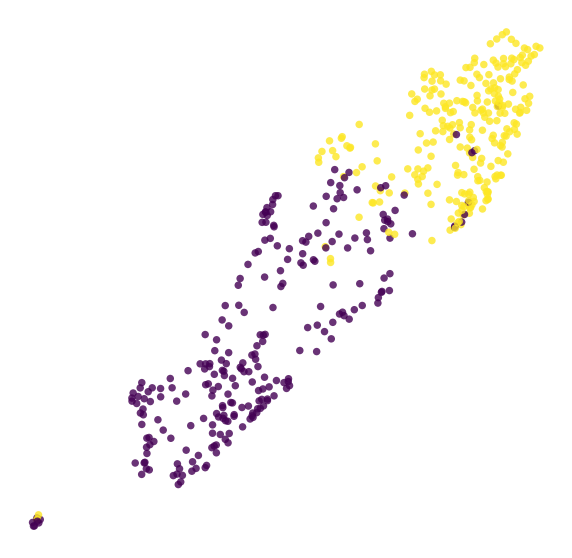

In [28]:
# embedding for x_train
embedding_xtrains = UMAP(n_neighbors=10,
                      min_dist=0.3,
                      n_components= 15
                      ).fit_transform(x_train2)    
print(embedding_xtrains.shape)              
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(embedding_xtrains[:,0], embedding_xtrains[:,1], 
            c=y_train1, 
            edgecolor='none', 
            alpha=0.80, 
            s=56)
plt.axis('off');

(171, 15)


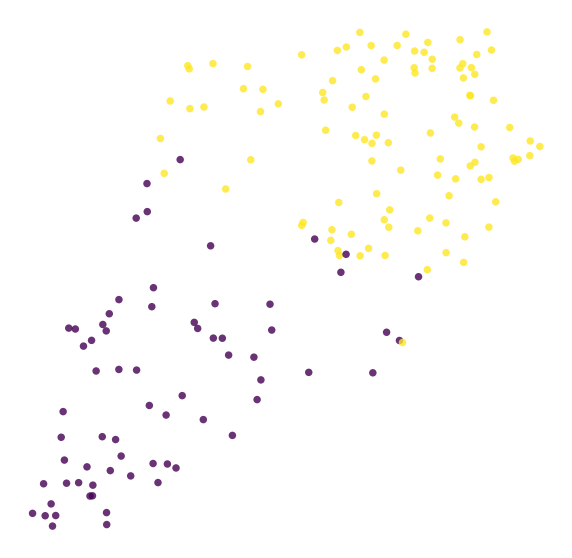

In [31]:
# embedding for x_test
embedding_xtests = UMAP(n_neighbors=10,
                      min_dist=0.3,
                      n_components = 15
                      ).fit_transform(x_test2) 
print(embedding_xtests.shape)                 
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(embedding_xtests[:,0], embedding_xtests[:,1], 
            c=y_test0, 
            edgecolor='none', 
            alpha=0.80, 
            s=56)
plt.axis('off');

# **Modeling + Assessment**

Confusion Metrics
      predicted_B  predicted_M
is_B           95            8
is_M           13           55
#######################################################
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        68
           1       0.88      0.92      0.90       103

    accuracy                           0.88       171
   macro avg       0.88      0.87      0.87       171
weighted avg       0.88      0.88      0.88       171



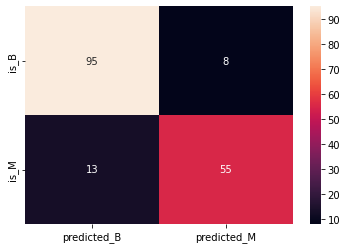

In [32]:
# Train SVM model with Normalized datasets
from sklearn.svm import SVC
svm_models = SVC(kernel = 'rbf',probability = True,C=0.001).fit(embedding_xtrains, y_train1)

# Prediction 
y_predictn = svm_models.predict(embedding_xtests)

# Confusion Matrix 
from sklearn.metrics import classification_report, confusion_matrix
cm = np.array(confusion_matrix(y_test0,y_predictn, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_B','is_M'], columns = ['predicted_B','predicted_M'])
print('Confusion Metrics')
print(confusion)
sns.heatmap(confusion,annot=True)
print('#######################################################')

print(classification_report(y_test0,y_predictn))